#**Week 2 - Feature Selection**

---



In [330]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [331]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [459]:
import plotly.express as px
import plotly.graph_objs as go
correlation_matrix = df.corr()

# Plotting the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='Viridis'))

fig.update_layout(title='Heatmap of Feature Correlations',
                  xaxis_nticks=36)

fig.show()

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [333]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [334]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

###Encoding
-----------------------------------------------------------------------

In [489]:

le = LabelEncoder()

df[' education'] = le.fit_transform(df[' education'])
df[' self_employed'] = le.fit_transform(df[' self_employed'])
df[' loan_status'] = le.fit_transform(df[' loan_status'])

df.head(5)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [336]:
df.drop('loan_id', axis=1, inplace=True)

In [337]:
df.corr()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246
luxury_assets_value,0.002817,-0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.015465


###Splitting the data as it is a good practice if we are to avoid overfitting of the model
-----------------------------------------------------------------------

In [338]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=[' loan_status'], axis=1),
    df[' loan_status'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2988, 11), (1281, 11))

#1) Filter Methods
-----------------------------------------------------------------------
  **- Variance Threshold**

In [339]:
var_thres=VarianceThreshold(threshold=0.8)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.8)

In [340]:
var_thres.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [341]:
sum(var_thres.get_support())

9

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [343]:
selected_features = X_train.columns[var_thres.get_support()]
selected_features

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

In [344]:
df[' education'].value_counts()
df[' self_employed'].value_counts()

 self_employed
1    2150
0    2119
Name: count, dtype: int64

In [345]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

2


- Two Columns, Education and Self Employed, are showing to have the least variance, that is, the most repetitive values.
-----------------------------------------------------------------------

In [346]:
for column in constant_columns:
    print(column)

 education
 self_employed


In [347]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg_prev = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg_prev)



Logistic Regression Accuracy: 0.6057767369242779


In [348]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt_prev = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Accuracy:", accuracy_dt_prev)



Decision Tree Accuracy: 0.9773614363778298


In [349]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit random forest classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf_prev = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf_prev)



Random Forest Accuracy: 0.9812646370023419


In [350]:
# X_train.drop(constant_columns,axis=1, inplace=True)
# X_test.drop(constant_columns,axis=1, inplace=True)

In [351]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit random forest classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy before:", accuracy_rf_prev)
print("\nRandom Forest Accuracy after:", accuracy_rf)



Random Forest Accuracy before: 0.9812646370023419

Random Forest Accuracy after: 0.9812646370023419


#- 0.2384% increase in accuracy for the RFC model


---



In [352]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Trees Accuracy before:", accuracy_dt_prev)
print("\nDecision Trees Accuracy after:", accuracy_dt)



Decision Trees Accuracy before: 0.9773614363778298

Decision Trees Accuracy after: 0.9773614363778298


#- 0.0798% increase in accuracy for the RFC model


---



In [353]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("\nLogistic Regression Accuracy before:", accuracy_logreg_prev)
print("\nLogistic Regression Accuracy after:", accuracy_logreg)




Logistic Regression Accuracy before: 0.6057767369242779

Logistic Regression Accuracy after: 0.6057767369242779


#- No change observed in Logistic Regression


---



##**- Correlation**
---



In [399]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [400]:
X_train.corr()

,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value
no_of_dependents,1.000000,-0.018693,-0.009269,0.018533,-0.044769,-0.008167,0.010990,0.012537
education,-0.018693,1.000000,0.013350,0.006437,0.017087,0.019611,0.003661,0.019736
self_employed,-0.009269,0.013350,1.000000,-0.001437,0.005781,0.015601,0.010008,-0.019131
income_annum,0.018533,0.006437,-0.001437,1.000000,0.001291,-0.015025,0.635855,0.645370
loan_term,-0.044769,0.017087,0.005781,0.001291,1.000000,0.011546,0.006940,-0.008830
cibil_score,-0.008167,0.019611,0.015601,-0.015025,0.011546,1.000000,0.008725,0.001834
residential_assets_value,0.010990,0.003661,0.010008,0.635855,0.006940,0.008725,1.000000,0.406185
commercial_assets_value,0.012537,0.019736,-0.019131,0.645370,-0.008830,0.001834,0.406185,1.000000


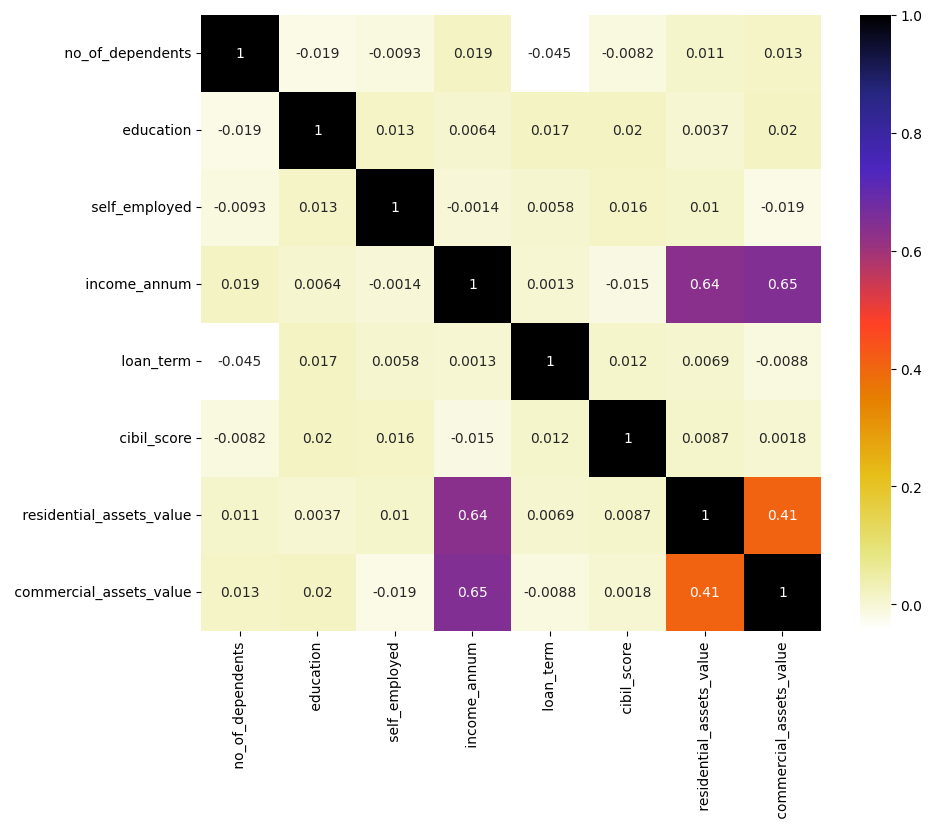

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [363]:
corr_features

{' bank_asset_value', ' loan_amount', ' luxury_assets_value'}

In [382]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [416]:
X = df.drop(" loan_status",axis=1)   #Feature Matrix
y = df[" loan_status"]

# X_train.drop(corr_features,axis=1, inplace=True)
# X_test.drop(corr_features,axis=1, inplace=True)

# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,
#     test_size=0.3,
#     random_state=0)

X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [417]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2988, 11), (1281, 11))

In [418]:
X_train.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,-0.018693,-0.009269,0.018533,0.007780,-0.044769,-0.008167,0.010990,0.012537,0.005747,0.018024
education,-0.018693,1.000000,0.013350,0.006437,0.005249,0.017087,0.019611,0.003661,0.019736,-0.002246,0.011417
self_employed,-0.009269,0.013350,1.000000,-0.001437,-0.001068,0.005781,0.015601,0.010008,-0.019131,-0.003282,-0.004215
income_annum,0.018533,0.006437,-0.001437,1.000000,0.926677,0.001291,-0.015025,0.635855,0.645370,0.926972,0.852552
loan_amount,0.007780,0.005249,-0.001068,0.926677,1.000000,-0.006265,-0.006729,0.592356,0.610020,0.857938,0.784582
loan_term,-0.044769,0.017087,0.005781,0.001291,-0.006265,1.000000,0.011546,0.006940,-0.008830,0.004342,0.004595
cibil_score,-0.008167,0.019611,0.015601,-0.015025,-0.006729,0.011546,1.000000,0.008725,0.001834,-0.024442,-0.008398
residential_assets_value,0.010990,0.003661,0.010008,0.635855,0.592356,0.006940,0.008725,1.000000,0.406185,0.586873,0.537282
commercial_assets_value,0.012537,0.019736,-0.019131,0.645370,0.610020,-0.008830,0.001834,0.406185,1.000000,0.591624,0.552586
luxury_assets_value,0.005747,-0.002246,-0.003282,0.926972,0.857938,0.004342,-0.024442,0.586873,0.591624,1.000000,0.785699


In [460]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

### Three features including bank_asset_value, loan_amount and luxury_assets_value are highly correlated with each other.


---



In [461]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [462]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg_prev = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg_prev)



Logistic Regression Accuracy: 0.6057767369242779


In [463]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt_prev = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Accuracy:", accuracy_dt_prev)



Decision Tree Accuracy: 0.9773614363778298


In [464]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit random forest classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf_prev = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf_prev)



Random Forest Accuracy: 0.9812646370023419


In [465]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)

In [466]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit random forest classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy before:", accuracy_rf_prev)
print("\nRandom Forest Accuracy after dropping Correlated features:", accuracy_rf)



Random Forest Accuracy before: 0.9812646370023419

Random Forest Accuracy after dropping Correlated features: 0.9594067135050741


#- 2.23% decrease in accuracy for the RFC model


---



In [467]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Trees Accuracy before:", accuracy_dt_prev)
print("\nDecision Trees Accuracy after dropping Correlated features:", accuracy_dt)



Decision Trees Accuracy before: 0.9773614363778298

Decision Trees Accuracy after dropping Correlated features: 0.9476971116315379


#- 3.0344% decrease in accuracy for the DTC model



---



In [468]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("\nLogistic Regression Accuracy before:", accuracy_logreg_prev)
print("\nLogistic Regression Accuracy after dropping Correlated features:", accuracy_logreg)




Logistic Regression Accuracy before: 0.6057767369242779

Logistic Regression Accuracy after dropping Correlated features: 0.6049960967993755


#- 0.1288% decrease in accuracy for the LR model


##**- Mutual Information**
---



- Higher values mean higher dependancy

In [469]:
from sklearn.feature_selection import mutual_info_classif
X = df.drop(" loan_status",axis=1)
y = df[" loan_status"]

X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [470]:
X_train,X_test,y_train,y_test=train_test_split(X,
    y,
    test_size=0.3,
    random_state=0)

In [471]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.00100733, 0.00234009, 0.00249619,
       0.01115369, 0.38523151, 0.        , 0.01692668, 0.01098331,
       0.        ])

In [472]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

 cibil_score                 0.385232
 commercial_assets_value     0.016927
 loan_term                   0.011154
 luxury_assets_value         0.010983
 loan_amount                 0.002496
 income_annum                0.002340
 self_employed               0.001007
 no_of_dependents            0.000000
 education                   0.000000
 residential_assets_value    0.000000
 bank_asset_value            0.000000
dtype: float64

<Axes: >

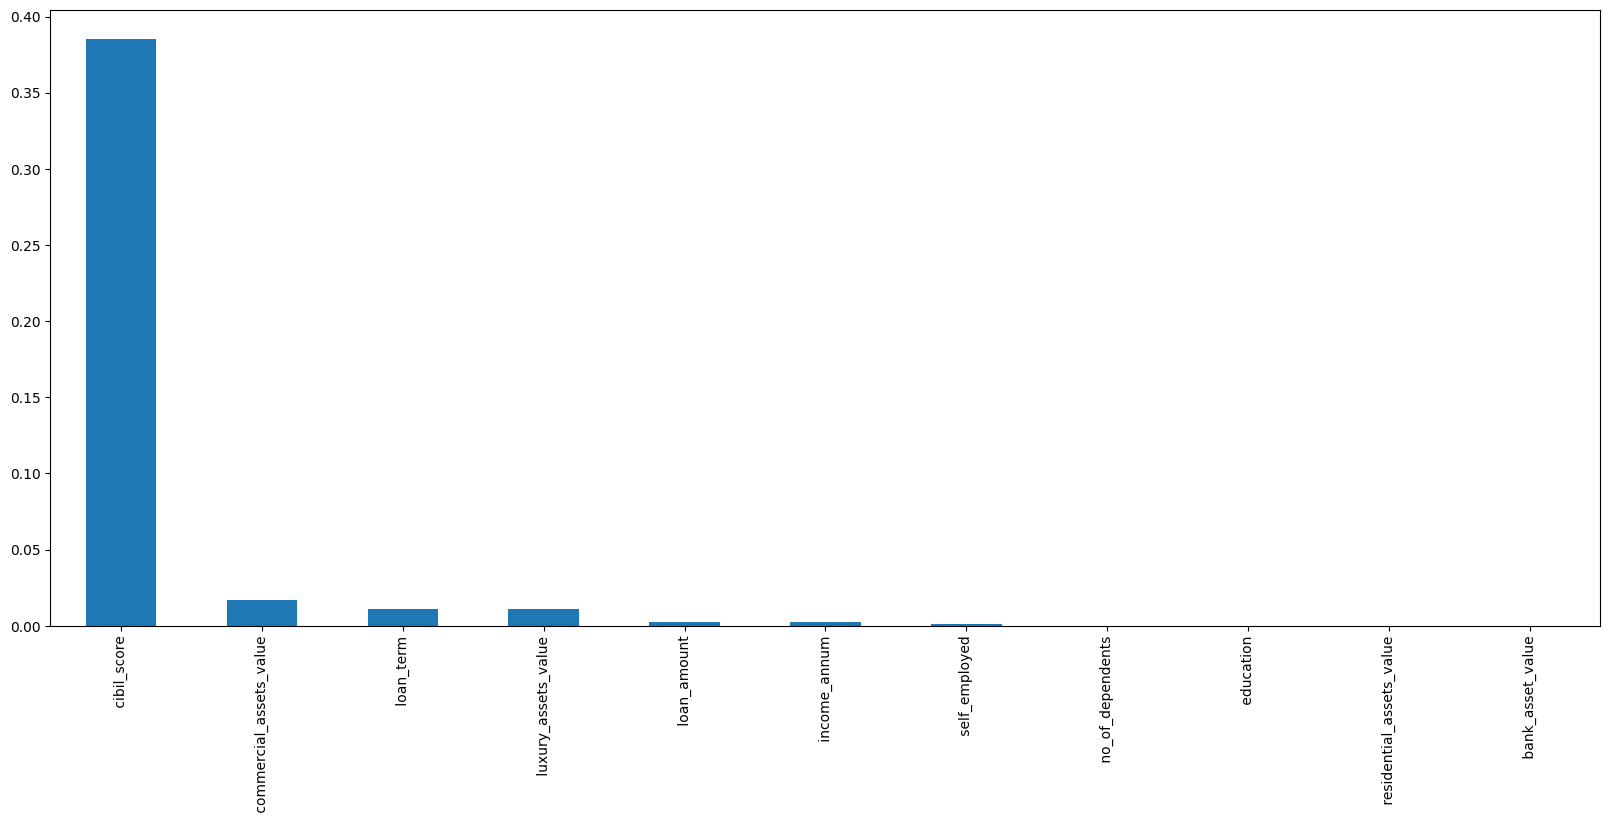

In [473]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [474]:
X.train.drop(column=' bank_asset_value', axis=1, inplace=True)
X.test.drop(column=' bank_asset_value', axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'train'

#Applying Model for evaluation


---



In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)



Logistic Regression Accuracy: 0.6057767369242779


In [116]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.9773614363778298
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       775
           1       0.98      0.96      0.97       506

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [117]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit random forest classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)



Random Forest Accuracy: 0.9812646370023419


#-Wrapper Methods